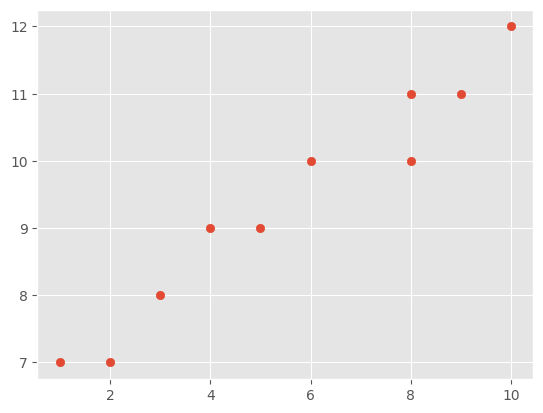

In [2]:

#evaluating models
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

plt.scatter(X, Y);

Our model is: y = 0.539x + 6.3796


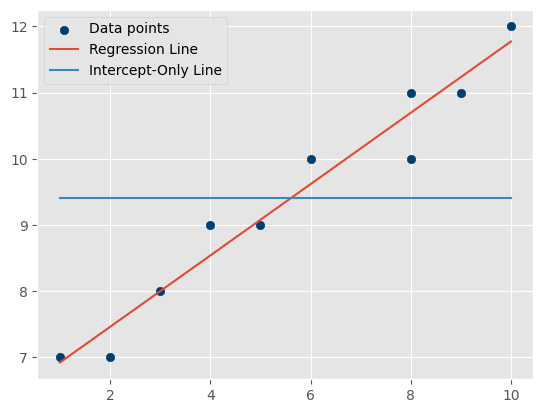

In [3]:
def calc_slope(x_vals, y_vals):
    # setting up components of formula
    rho = np.corrcoef(x_vals, y_vals)[0][1]
    s_y = y_vals.std()
    s_x = x_vals.std()
    
    # calculating slope estimate
    m = rho * s_y / s_x
    return m

def calc_intercept(m, x_vals, y_vals):
    # setting up components of formula
    y_mean = y_vals.mean()
    x_mean = x_vals.mean()
    
    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c

fig, ax = plt.subplots()
ax.scatter(X, Y, color='#003F72', label="Data points")
    
m = calc_slope(X, Y)
c = calc_intercept(m, X, Y)
print(f"Our model is: y = {round(m, 3)}x + {round(c, 4)}")

regression_line = m * X + c
ax.plot(X, regression_line, label="Regression Line")

intercept_only_line = np.array([Y.mean() for x in X])
ax.plot(X, intercept_only_line, label="Intercept-Only Line")

ax.legend();

In [4]:
#ess(explained sum of squares) = is the squared differences between the predicted y values and the mean of 
ess=((regression_line-intercept_only_line)**2).sum()
ess

np.float64(25.133796296296296)

In [5]:
df_model=1

In [6]:
mse_model=ess/df_model
mse_model

np.float64(25.133796296296296)

In [8]:
#--residual sum of difference bten linear regression and actual y values
rss=((regression_line-Y)**2).sum()
rss

np.float64(1.266203703703704)

In [10]:
#degrees of freedom for residuals
residuals_df=len(Y)-2
residuals_df

8

In [11]:
#mse for residuals
mse_residuals=rss/residuals_df
mse_residuals

np.float64(0.158275462962963)

In [12]:
f_statistic=mse_model/mse_residuals
f_statistic

np.float64(158.7978062157221)

In [13]:
from scipy import stats

In [15]:
p_value=stats.f.sf(f_statistic, df_model, residuals_df)
p_value

np.float64(1.4755820678821617e-06)

In [16]:
#pvalue is less than 0.05 so we reject null hypothesis and conclude that there is a significant linear relationship between X and Y